In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f99002b65c0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f99002b63c8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f99002b63c8>)


Epoch 1: 3.3s to complete
    error(train)=3.02e+00, acc(train)=2.83e-01, error(valid)=3.02e+00, acc(valid)=2.75e-01


Epoch 2: 3.1s to complete
    error(train)=1.69e+00, acc(train)=5.37e-01, error(valid)=1.71e+00, acc(valid)=5.31e-01


Epoch 3: 3.0s to complete
    error(train)=1.40e+00, acc(train)=6.05e-01, error(valid)=1.43e+00, acc(valid)=5.99e-01


Epoch 4: 3.0s to complete
    error(train)=1.28e+00, acc(train)=6.36e-01, error(valid)=1.31e+00, acc(valid)=6.27e-01


Epoch 5: 3.1s to complete
    error(train)=1.19e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.50e-01


Epoch 6: 3.1s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.14e+00, acc(valid)=6.73e-01


Epoch 7: 3.1s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


Epoch 8: 3.0s to complete
    error(train)=9.98e-01, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.01e-01


Epoch 9: 3.4s to complete
    error(train)=9.53e-01, acc(train)=7.23e-01, error(valid)=9.90e-01, acc(valid)=7.11e-01


Epoch 10: 3.4s to complete
    error(train)=9.03e-01, acc(train)=7.37e-01, error(valid)=9.43e-01, acc(valid)=7.22e-01


Epoch 11: 4.0s to complete
    error(train)=8.74e-01, acc(train)=7.45e-01, error(valid)=9.16e-01, acc(valid)=7.30e-01


Epoch 12: 3.4s to complete
    error(train)=8.38e-01, acc(train)=7.52e-01, error(valid)=8.83e-01, acc(valid)=7.39e-01


Epoch 13: 3.1s to complete
    error(train)=8.14e-01, acc(train)=7.58e-01, error(valid)=8.60e-01, acc(valid)=7.43e-01


Epoch 14: 3.1s to complete
    error(train)=7.84e-01, acc(train)=7.66e-01, error(valid)=8.33e-01, acc(valid)=7.49e-01


Epoch 15: 3.1s to complete
    error(train)=7.59e-01, acc(train)=7.72e-01, error(valid)=8.10e-01, acc(valid)=7.57e-01


Epoch 16: 3.1s to complete
    error(train)=7.40e-01, acc(train)=7.77e-01, error(valid)=7.94e-01, acc(valid)=7.58e-01


Epoch 17: 3.1s to complete
    error(train)=7.20e-01, acc(train)=7.82e-01, error(valid)=7.77e-01, acc(valid)=7.66e-01


Epoch 18: 3.1s to complete
    error(train)=7.09e-01, acc(train)=7.84e-01, error(valid)=7.67e-01, acc(valid)=7.65e-01


Epoch 19: 3.1s to complete
    error(train)=6.94e-01, acc(train)=7.87e-01, error(valid)=7.51e-01, acc(valid)=7.69e-01


Epoch 20: 3.1s to complete
    error(train)=6.79e-01, acc(train)=7.93e-01, error(valid)=7.40e-01, acc(valid)=7.72e-01


Epoch 21: 3.1s to complete
    error(train)=6.64e-01, acc(train)=7.96e-01, error(valid)=7.24e-01, acc(valid)=7.74e-01


Epoch 22: 3.1s to complete
    error(train)=6.55e-01, acc(train)=7.98e-01, error(valid)=7.18e-01, acc(valid)=7.80e-01


Epoch 23: 3.1s to complete
    error(train)=6.37e-01, acc(train)=8.04e-01, error(valid)=7.00e-01, acc(valid)=7.82e-01


Epoch 24: 3.1s to complete
    error(train)=6.31e-01, acc(train)=8.04e-01, error(valid)=6.97e-01, acc(valid)=7.83e-01


Epoch 25: 3.1s to complete
    error(train)=6.21e-01, acc(train)=8.08e-01, error(valid)=6.89e-01, acc(valid)=7.87e-01


Epoch 26: 3.1s to complete
    error(train)=6.13e-01, acc(train)=8.09e-01, error(valid)=6.82e-01, acc(valid)=7.90e-01


Epoch 27: 3.1s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.70e-01, acc(valid)=7.92e-01


Epoch 28: 3.1s to complete
    error(train)=5.97e-01, acc(train)=8.13e-01, error(valid)=6.72e-01, acc(valid)=7.90e-01


Epoch 29: 3.1s to complete
    error(train)=5.82e-01, acc(train)=8.18e-01, error(valid)=6.58e-01, acc(valid)=7.94e-01


Epoch 30: 3.1s to complete
    error(train)=5.84e-01, acc(train)=8.13e-01, error(valid)=6.58e-01, acc(valid)=7.90e-01


Epoch 31: 3.1s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=6.56e-01, acc(valid)=7.95e-01


Epoch 32: 3.2s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.44e-01, acc(valid)=7.98e-01


Epoch 33: 3.2s to complete
    error(train)=5.59e-01, acc(train)=8.23e-01, error(valid)=6.40e-01, acc(valid)=7.99e-01


Epoch 34: 3.2s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=6.33e-01, acc(valid)=8.00e-01


Epoch 35: 3.1s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=6.29e-01, acc(valid)=7.99e-01


Epoch 36: 3.1s to complete
    error(train)=5.41e-01, acc(train)=8.28e-01, error(valid)=6.28e-01, acc(valid)=8.04e-01


Epoch 37: 3.1s to complete
    error(train)=5.35e-01, acc(train)=8.29e-01, error(valid)=6.22e-01, acc(valid)=8.04e-01


Epoch 38: 3.2s to complete
    error(train)=5.24e-01, acc(train)=8.32e-01, error(valid)=6.12e-01, acc(valid)=8.06e-01


Epoch 39: 3.2s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=6.10e-01, acc(valid)=8.08e-01


Epoch 40: 3.1s to complete
    error(train)=5.12e-01, acc(train)=8.36e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 41: 3.1s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=5.97e-01, acc(valid)=8.10e-01


Epoch 42: 3.1s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.97e-01, acc(valid)=8.11e-01


Epoch 43: 3.3s to complete
    error(train)=4.99e-01, acc(train)=8.41e-01, error(valid)=5.92e-01, acc(valid)=8.11e-01


Epoch 44: 3.1s to complete
    error(train)=4.98e-01, acc(train)=8.39e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


Epoch 45: 3.1s to complete
    error(train)=4.93e-01, acc(train)=8.39e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 46: 3.1s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.89e-01, acc(valid)=8.14e-01


Epoch 47: 3.1s to complete
    error(train)=4.85e-01, acc(train)=8.43e-01, error(valid)=5.84e-01, acc(valid)=8.13e-01


Epoch 48: 3.1s to complete
    error(train)=4.81e-01, acc(train)=8.44e-01, error(valid)=5.80e-01, acc(valid)=8.14e-01


Epoch 49: 3.1s to complete
    error(train)=4.79e-01, acc(train)=8.44e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 50: 3.2s to complete
    error(train)=4.70e-01, acc(train)=8.47e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 51: 3.1s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 52: 3.1s to complete
    error(train)=4.67e-01, acc(train)=8.46e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


Epoch 53: 3.1s to complete
    error(train)=4.66e-01, acc(train)=8.48e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


Epoch 54: 3.1s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


Epoch 55: 3.1s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


Epoch 56: 3.1s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


Epoch 57: 3.2s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 58: 3.2s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.66e-01, acc(valid)=8.15e-01


Epoch 59: 3.1s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 60: 3.1s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


Epoch 61: 3.1s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.60e-01, acc(valid)=8.19e-01


Epoch 62: 3.1s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 63: 3.1s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 64: 3.2s to complete
    error(train)=4.33e-01, acc(train)=8.55e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


Epoch 65: 3.2s to complete
    error(train)=4.28e-01, acc(train)=8.58e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


Epoch 66: 3.2s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 67: 3.1s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 68: 3.2s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 69: 3.2s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 70: 3.1s to complete
    error(train)=4.22e-01, acc(train)=8.58e-01, error(valid)=5.53e-01, acc(valid)=8.21e-01


Epoch 71: 3.1s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 72: 3.1s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 73: 3.2s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.49e-01, acc(valid)=8.26e-01


Epoch 74: 3.4s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 75: 3.5s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 76: 3.7s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 77: 4.0s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


Epoch 78: 3.2s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 79: 3.2s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 80: 3.2s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 81: 3.1s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 82: 3.1s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 83: 3.1s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


Epoch 84: 3.2s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


Epoch 85: 3.1s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 86: 3.1s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 87: 3.1s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 88: 3.1s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


Epoch 89: 3.1s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


Epoch 90: 3.2s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 91: 3.1s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


Epoch 92: 3.2s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 93: 3.2s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=5.36e-01, acc(valid)=8.32e-01


Epoch 94: 3.2s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 95: 3.1s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 96: 3.1s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 97: 3.1s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 98: 3.2s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 99: 3.2s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 100: 3.2s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


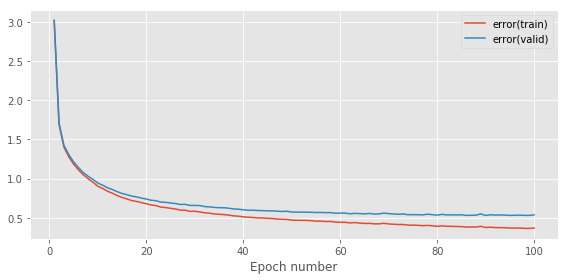

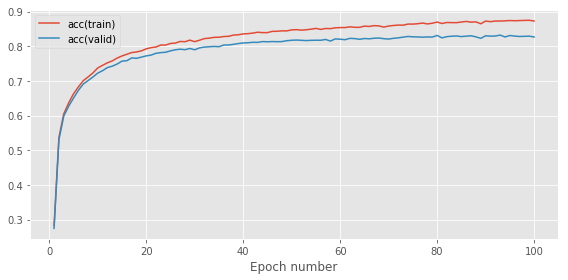

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.0075
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit()
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,fileName='cw4_1_SGD_test_3Hidden')

Epoch 1: 4.5s to complete
    error(train)=1.61e+00, acc(train)=5.61e-01, error(valid)=1.63e+00, acc(valid)=5.53e-01


Epoch 2: 4.3s to complete
    error(train)=1.25e+00, acc(train)=6.48e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


Epoch 3: 4.4s to complete
    error(train)=1.11e+00, acc(train)=6.83e-01, error(valid)=1.15e+00, acc(valid)=6.73e-01


Epoch 4: 4.5s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


Epoch 5: 4.4s to complete
    error(train)=9.36e-01, acc(train)=7.29e-01, error(valid)=9.77e-01, acc(valid)=7.14e-01


Epoch 6: 4.5s to complete
    error(train)=8.77e-01, acc(train)=7.43e-01, error(valid)=9.23e-01, acc(valid)=7.25e-01


Epoch 7: 4.5s to complete
    error(train)=8.27e-01, acc(train)=7.55e-01, error(valid)=8.74e-01, acc(valid)=7.36e-01


Epoch 8: 4.9s to complete
    error(train)=7.89e-01, acc(train)=7.66e-01, error(valid)=8.42e-01, acc(valid)=7.45e-01


Epoch 9: 4.7s to complete
    error(train)=7.56e-01, acc(train)=7.74e-01, error(valid)=8.11e-01, acc(valid)=7.54e-01


Epoch 10: 4.7s to complete
    error(train)=7.26e-01, acc(train)=7.81e-01, error(valid)=7.83e-01, acc(valid)=7.61e-01


Epoch 11: 4.7s to complete
    error(train)=7.08e-01, acc(train)=7.87e-01, error(valid)=7.70e-01, acc(valid)=7.65e-01


Epoch 12: 4.8s to complete
    error(train)=6.84e-01, acc(train)=7.91e-01, error(valid)=7.47e-01, acc(valid)=7.71e-01


Epoch 13: 4.8s to complete
    error(train)=6.63e-01, acc(train)=7.98e-01, error(valid)=7.29e-01, acc(valid)=7.76e-01


Epoch 14: 4.9s to complete
    error(train)=6.48e-01, acc(train)=8.02e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


Epoch 15: 4.8s to complete
    error(train)=6.37e-01, acc(train)=8.03e-01, error(valid)=7.07e-01, acc(valid)=7.79e-01


Epoch 16: 4.7s to complete
    error(train)=6.22e-01, acc(train)=8.07e-01, error(valid)=6.97e-01, acc(valid)=7.82e-01


Epoch 17: 4.7s to complete
    error(train)=6.05e-01, acc(train)=8.12e-01, error(valid)=6.81e-01, acc(valid)=7.87e-01


Epoch 18: 4.7s to complete
    error(train)=5.93e-01, acc(train)=8.15e-01, error(valid)=6.74e-01, acc(valid)=7.91e-01


Epoch 19: 4.7s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.61e-01, acc(valid)=7.91e-01


Epoch 20: 4.7s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.54e-01, acc(valid)=7.96e-01


Epoch 21: 4.7s to complete
    error(train)=5.60e-01, acc(train)=8.25e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


Epoch 22: 4.6s to complete
    error(train)=5.54e-01, acc(train)=8.25e-01, error(valid)=6.41e-01, acc(valid)=7.98e-01


Epoch 23: 4.7s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


Epoch 24: 4.7s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=6.29e-01, acc(valid)=8.03e-01


Epoch 25: 4.8s to complete
    error(train)=5.30e-01, acc(train)=8.33e-01, error(valid)=6.24e-01, acc(valid)=8.03e-01


Epoch 26: 4.7s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=6.22e-01, acc(valid)=8.03e-01


Epoch 27: 4.7s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=6.14e-01, acc(valid)=8.05e-01


Epoch 28: 4.7s to complete
    error(train)=5.08e-01, acc(train)=8.39e-01, error(valid)=6.13e-01, acc(valid)=8.07e-01


Epoch 29: 4.7s to complete
    error(train)=5.03e-01, acc(train)=8.41e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


Epoch 30: 5.1s to complete
    error(train)=4.95e-01, acc(train)=8.42e-01, error(valid)=6.01e-01, acc(valid)=8.08e-01


Epoch 31: 5.8s to complete
    error(train)=4.90e-01, acc(train)=8.44e-01, error(valid)=6.03e-01, acc(valid)=8.09e-01


Epoch 32: 4.8s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01


Epoch 33: 4.7s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


Epoch 34: 4.7s to complete
    error(train)=4.74e-01, acc(train)=8.48e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 35: 4.7s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 36: 4.6s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


Epoch 37: 4.6s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


Epoch 38: 4.6s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


Epoch 39: 4.6s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.84e-01, acc(valid)=8.14e-01


Epoch 40: 4.5s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.86e-01, acc(valid)=8.14e-01


Epoch 41: 4.5s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


Epoch 42: 4.6s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.78e-01, acc(valid)=8.15e-01


Epoch 43: 4.6s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.80e-01, acc(valid)=8.14e-01


Epoch 44: 4.6s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


Epoch 45: 4.6s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


Epoch 46: 4.8s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 47: 4.8s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 48: 4.7s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


Epoch 49: 4.7s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.69e-01, acc(valid)=8.22e-01


Epoch 50: 4.8s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.68e-01, acc(valid)=8.17e-01


Epoch 51: 4.6s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 52: 4.7s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 53: 4.7s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


Epoch 54: 4.6s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 55: 4.6s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 56: 4.6s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 57: 4.7s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 58: 4.6s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 59: 4.6s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 60: 4.7s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.69e-01, acc(valid)=8.23e-01


Epoch 61: 4.6s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 62: 4.6s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 63: 4.7s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=5.65e-01, acc(valid)=8.24e-01


Epoch 64: 4.6s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


Epoch 65: 4.6s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.69e-01, acc(valid)=8.22e-01


Epoch 66: 4.6s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=5.72e-01, acc(valid)=8.21e-01


Epoch 67: 4.6s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.69e-01, acc(valid)=8.22e-01


Epoch 68: 4.7s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 69: 4.6s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=5.81e-01, acc(valid)=8.19e-01


Epoch 70: 4.6s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.72e-01, acc(valid)=8.22e-01


Epoch 71: 4.7s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01


Epoch 72: 4.7s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.67e-01, acc(valid)=8.24e-01


Epoch 73: 4.7s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=5.78e-01, acc(valid)=8.21e-01


Epoch 74: 4.7s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=5.72e-01, acc(valid)=8.23e-01


Epoch 75: 4.7s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=5.70e-01, acc(valid)=8.23e-01


Epoch 76: 4.6s to complete
    error(train)=3.53e-01, acc(train)=8.82e-01, error(valid)=5.66e-01, acc(valid)=8.24e-01


Epoch 77: 4.6s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.68e-01, acc(valid)=8.25e-01


Epoch 78: 4.6s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=5.72e-01, acc(valid)=8.21e-01


Epoch 79: 5.1s to complete
    error(train)=3.45e-01, acc(train)=8.84e-01, error(valid)=5.68e-01, acc(valid)=8.24e-01


Epoch 80: 5.1s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.76e-01, acc(valid)=8.22e-01


Epoch 81: 5.5s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


Epoch 82: 4.8s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.76e-01, acc(valid)=8.23e-01


Epoch 83: 4.6s to complete
    error(train)=3.43e-01, acc(train)=8.84e-01, error(valid)=5.72e-01, acc(valid)=8.23e-01


Epoch 84: 4.6s to complete
    error(train)=3.40e-01, acc(train)=8.86e-01, error(valid)=5.73e-01, acc(valid)=8.23e-01


Epoch 85: 4.6s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.73e-01, acc(valid)=8.24e-01


Epoch 86: 4.6s to complete
    error(train)=3.37e-01, acc(train)=8.86e-01, error(valid)=5.75e-01, acc(valid)=8.26e-01


Epoch 87: 4.6s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=5.75e-01, acc(valid)=8.24e-01


Epoch 88: 4.6s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=5.80e-01, acc(valid)=8.21e-01


Epoch 89: 4.6s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.85e-01, acc(valid)=8.23e-01


Epoch 90: 4.6s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.77e-01, acc(valid)=8.25e-01


Epoch 91: 4.6s to complete
    error(train)=3.31e-01, acc(train)=8.88e-01, error(valid)=5.79e-01, acc(valid)=8.23e-01


Epoch 92: 4.6s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.84e-01, acc(valid)=8.22e-01


Epoch 93: 4.6s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.87e-01, acc(valid)=8.19e-01


Epoch 94: 4.6s to complete
    error(train)=3.25e-01, acc(train)=8.90e-01, error(valid)=5.84e-01, acc(valid)=8.24e-01


Epoch 95: 4.6s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.83e-01, acc(valid)=8.24e-01


Epoch 96: 4.6s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=5.81e-01, acc(valid)=8.23e-01


Epoch 97: 4.6s to complete
    error(train)=3.18e-01, acc(train)=8.92e-01, error(valid)=5.79e-01, acc(valid)=8.26e-01


Epoch 98: 4.6s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.84e-01, acc(valid)=8.25e-01


Epoch 99: 4.6s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.85e-01, acc(valid)=8.26e-01


Epoch 100: 4.6s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.85e-01, acc(valid)=8.25e-01


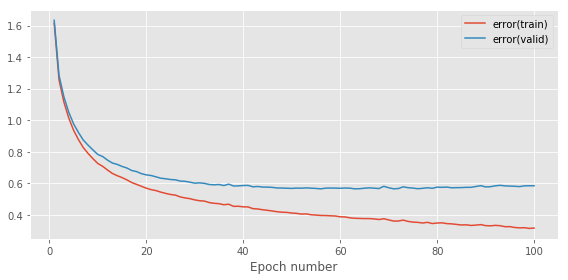

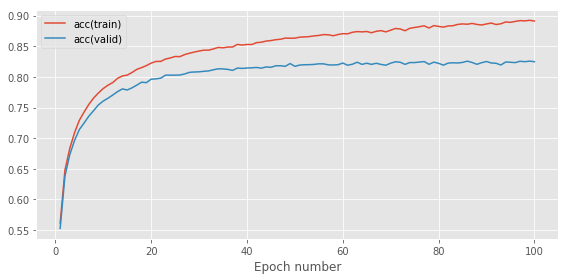

In [4]:
####RMSProp

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit()
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError()

# for rate in learning_rates:
#     # Use a basic gradient descent learning rule
#     learning_rule = RMSPropLearningRule(learning_rate=rate)

#     #Remember to use notebook=False when you write a script to be run in a terminal
#     _ = train_model_and_plot_stats(
#         model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    

# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,fileName='cw4_2_RMS_test_{}'.format(learning_rate))

Epoch 1: 4.8s to complete
    error(train)=1.45e+00, acc(train)=5.97e-01, error(valid)=1.47e+00, acc(valid)=5.89e-01


Epoch 2: 4.7s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.21e+00, acc(valid)=6.54e-01


Epoch 3: 4.7s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.85e-01


Epoch 4: 4.7s to complete
    error(train)=9.56e-01, acc(train)=7.23e-01, error(valid)=9.95e-01, acc(valid)=7.08e-01


Epoch 5: 4.7s to complete
    error(train)=8.94e-01, acc(train)=7.39e-01, error(valid)=9.40e-01, acc(valid)=7.23e-01


Epoch 6: 4.7s to complete
    error(train)=8.41e-01, acc(train)=7.52e-01, error(valid)=8.87e-01, acc(valid)=7.34e-01


Epoch 7: 4.7s to complete
    error(train)=7.96e-01, acc(train)=7.64e-01, error(valid)=8.48e-01, acc(valid)=7.45e-01


Epoch 8: 4.9s to complete
    error(train)=7.61e-01, acc(train)=7.72e-01, error(valid)=8.15e-01, acc(valid)=7.53e-01


Epoch 9: 4.9s to complete
    error(train)=7.29e-01, acc(train)=7.80e-01, error(valid)=7.86e-01, acc(valid)=7.61e-01


Epoch 10: 4.9s to complete
    error(train)=7.04e-01, acc(train)=7.87e-01, error(valid)=7.66e-01, acc(valid)=7.65e-01


Epoch 11: 4.9s to complete
    error(train)=6.87e-01, acc(train)=7.90e-01, error(valid)=7.49e-01, acc(valid)=7.68e-01


Epoch 12: 4.8s to complete
    error(train)=6.62e-01, acc(train)=7.97e-01, error(valid)=7.31e-01, acc(valid)=7.74e-01


Epoch 13: 4.9s to complete
    error(train)=6.47e-01, acc(train)=8.00e-01, error(valid)=7.14e-01, acc(valid)=7.77e-01


Epoch 14: 4.9s to complete
    error(train)=6.30e-01, acc(train)=8.04e-01, error(valid)=6.98e-01, acc(valid)=7.83e-01


Epoch 15: 4.9s to complete
    error(train)=6.15e-01, acc(train)=8.09e-01, error(valid)=6.93e-01, acc(valid)=7.83e-01


Epoch 16: 4.9s to complete
    error(train)=5.99e-01, acc(train)=8.13e-01, error(valid)=6.76e-01, acc(valid)=7.87e-01


Epoch 17: 4.9s to complete
    error(train)=5.89e-01, acc(train)=8.16e-01, error(valid)=6.67e-01, acc(valid)=7.90e-01


Epoch 18: 5.0s to complete
    error(train)=5.79e-01, acc(train)=8.19e-01, error(valid)=6.64e-01, acc(valid)=7.92e-01


Epoch 19: 5.0s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.52e-01, acc(valid)=7.96e-01


Epoch 20: 4.9s to complete
    error(train)=5.59e-01, acc(train)=8.24e-01, error(valid)=6.46e-01, acc(valid)=7.97e-01


Epoch 21: 4.9s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=6.40e-01, acc(valid)=7.97e-01


Epoch 22: 5.0s to complete
    error(train)=5.38e-01, acc(train)=8.29e-01, error(valid)=6.32e-01, acc(valid)=8.00e-01


Epoch 23: 4.9s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=6.30e-01, acc(valid)=8.02e-01


Epoch 24: 5.0s to complete
    error(train)=5.22e-01, acc(train)=8.33e-01, error(valid)=6.23e-01, acc(valid)=8.04e-01


Epoch 25: 5.1s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=6.20e-01, acc(valid)=8.02e-01


Epoch 26: 5.0s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=6.10e-01, acc(valid)=8.07e-01


Epoch 27: 5.3s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=6.09e-01, acc(valid)=8.06e-01


Epoch 28: 5.6s to complete
    error(train)=4.92e-01, acc(train)=8.42e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


Epoch 29: 6.3s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 30: 5.3s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


Epoch 31: 5.0s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


Epoch 32: 5.3s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.90e-01, acc(valid)=8.11e-01


Epoch 33: 5.4s to complete
    error(train)=4.67e-01, acc(train)=8.48e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


Epoch 34: 5.4s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


Epoch 35: 5.4s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.83e-01, acc(valid)=8.12e-01


Epoch 36: 5.4s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=5.82e-01, acc(valid)=8.12e-01


Epoch 37: 5.6s to complete
    error(train)=4.48e-01, acc(train)=8.51e-01, error(valid)=5.76e-01, acc(valid)=8.13e-01


Epoch 38: 5.3s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.77e-01, acc(valid)=8.13e-01


Epoch 39: 5.0s to complete
    error(train)=4.40e-01, acc(train)=8.54e-01, error(valid)=5.74e-01, acc(valid)=8.14e-01


Epoch 40: 5.0s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.73e-01, acc(valid)=8.16e-01


Epoch 41: 5.0s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


Epoch 42: 4.9s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 43: 5.0s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


Epoch 44: 5.0s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


Epoch 45: 5.0s to complete
    error(train)=4.22e-01, acc(train)=8.58e-01, error(valid)=5.70e-01, acc(valid)=8.14e-01


Epoch 46: 5.0s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


Epoch 47: 4.9s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.62e-01, acc(valid)=8.19e-01


Epoch 48: 4.9s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


Epoch 49: 5.0s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 50: 5.1s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


Epoch 51: 5.0s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.60e-01, acc(valid)=8.18e-01


Epoch 52: 4.9s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 53: 4.9s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 54: 4.9s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 55: 5.0s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 56: 5.4s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 57: 5.2s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 58: 5.7s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 59: 5.6s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 60: 4.9s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 61: 4.9s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


Epoch 62: 5.0s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 63: 5.0s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 64: 5.0s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 65: 4.9s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 66: 4.9s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 67: 4.9s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 68: 4.9s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 69: 4.9s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


Epoch 70: 4.9s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 71: 5.0s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


Epoch 72: 5.0s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.55e-01, acc(valid)=8.27e-01


Epoch 73: 5.3s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.61e-01, acc(valid)=8.25e-01


Epoch 74: 5.6s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


Epoch 75: 6.2s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 76: 5.2s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 77: 5.0s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


Epoch 78: 5.1s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.56e-01, acc(valid)=8.27e-01


Epoch 79: 5.1s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 80: 5.1s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.53e-01, acc(valid)=8.29e-01


Epoch 81: 4.9s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=5.59e-01, acc(valid)=8.24e-01


Epoch 82: 4.9s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.55e-01, acc(valid)=8.29e-01


Epoch 83: 4.9s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=5.55e-01, acc(valid)=8.26e-01


Epoch 84: 4.8s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.53e-01, acc(valid)=8.27e-01


Epoch 85: 4.9s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 86: 4.9s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.56e-01, acc(valid)=8.27e-01


Epoch 87: 4.9s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.58e-01, acc(valid)=8.27e-01


Epoch 88: 4.9s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.57e-01, acc(valid)=8.27e-01


Epoch 89: 4.9s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.58e-01, acc(valid)=8.27e-01


Epoch 90: 5.0s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.60e-01, acc(valid)=8.27e-01


Epoch 91: 4.9s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.60e-01, acc(valid)=8.28e-01


Epoch 92: 4.9s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.57e-01, acc(valid)=8.28e-01


Epoch 93: 4.9s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.65e-01, acc(valid)=8.26e-01


Epoch 94: 4.9s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


Epoch 95: 4.9s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.60e-01, acc(valid)=8.26e-01


Epoch 96: 4.9s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.61e-01, acc(valid)=8.26e-01


Epoch 97: 5.0s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=5.71e-01, acc(valid)=8.25e-01


Epoch 98: 5.0s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


Epoch 99: 4.9s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=5.64e-01, acc(valid)=8.26e-01


Epoch 100: 4.9s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=5.64e-01, acc(valid)=8.27e-01


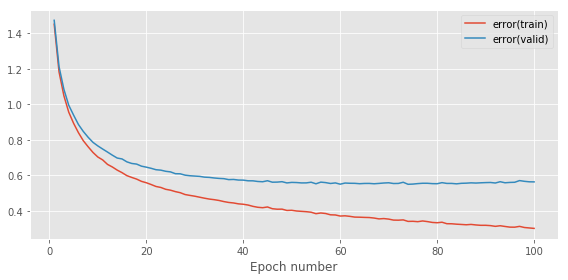

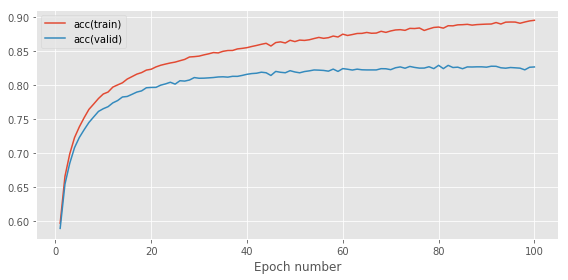

In [5]:
#Adam

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit()
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,fileName='cw4_2_Adam_test_{}'.format(learning_rate))